In [40]:
#import libraries
import pandas as pd
import numpy as np

In [41]:
data_gold = pd.read_csv("./data/GoldData.csv",na_values=['null'],index_col='Ngày',parse_dates=True,infer_datetime_format=True)
data_gold = data_gold.drop('KL', axis = 1)
data_gold.dropna()

,Lần cuối,Mở,Cao,Thấp
Ngày,,,,
2018-05-21,1290.9,1290.3,1292.7,1281.2
2018-05-22,1292.0,1292.3,1296.0,1287.2
2018-05-23,1289.6,1290.6,1298.4,1286.7
2018-05-24,1304.4,1293.3,1306.4,1292.2
2018-05-25,1303.7,1304.0,1307.2,1299.4
...,...,...,...,...
2023-05-15,2018.0,2013.8,2017.1,2013.8
2023-05-16,1988.4,2021.3,2022.7,1989.1
2023-05-17,1980.7,1983.6,1983.6,1983.6


In [42]:
data_gold.head()

,Lần cuối,Mở,Cao,Thấp
Ngày,,,,
2018-05-21,1290.9,1290.3,1292.7,1281.2
2018-05-22,1292.0,1292.3,1296.0,1287.2
2018-05-23,1289.6,1290.6,1298.4,1286.7
2018-05-24,1304.4,1293.3,1306.4,1292.2
2018-05-25,1303.7,1304.0,1307.2,1299.4


In [43]:
data_gold.shape

(1296, 4)

In [44]:
data_gold.describe()

,Lần cuối,Mở,Cao,Thấp
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,1657.157253,1657.419946,1668.953858,1645.013889
std,247.037374,247.289166,250.206107,243.663453
min,1184.000000,1180.700000,1189.000000,1167.100000
25%,1467.675000,1465.800000,1473.625000,1459.100000
50%,1751.750000,1751.550000,1761.200000,1735.750000
75%,1841.325000,1840.725000,1853.300000,1828.425000
max,2069.400000,2076.400000,2089.200000,2049.000000


In [45]:
data_gold.columns

Index(['Lần cuối', 'Mở', 'Cao', 'Thấp'], dtype='object')

## Trực quan hóa dữ liệu

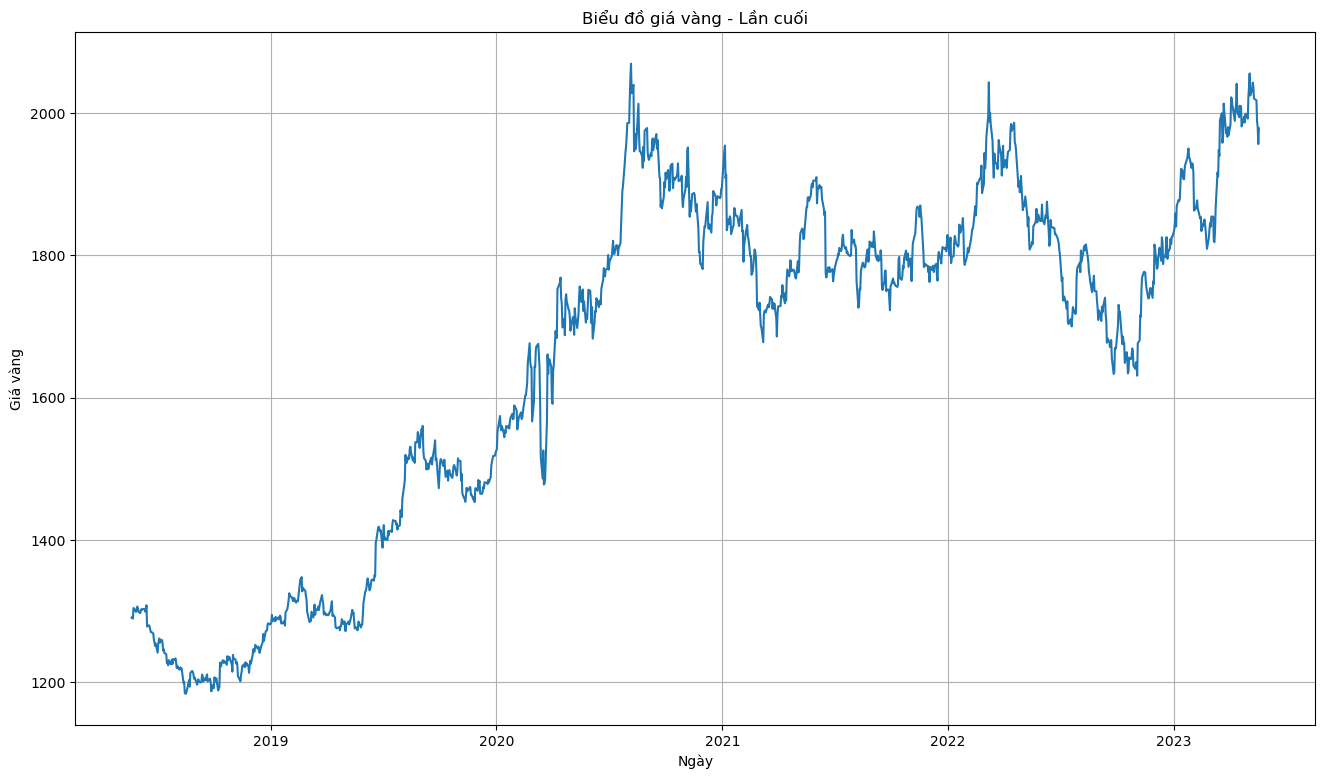

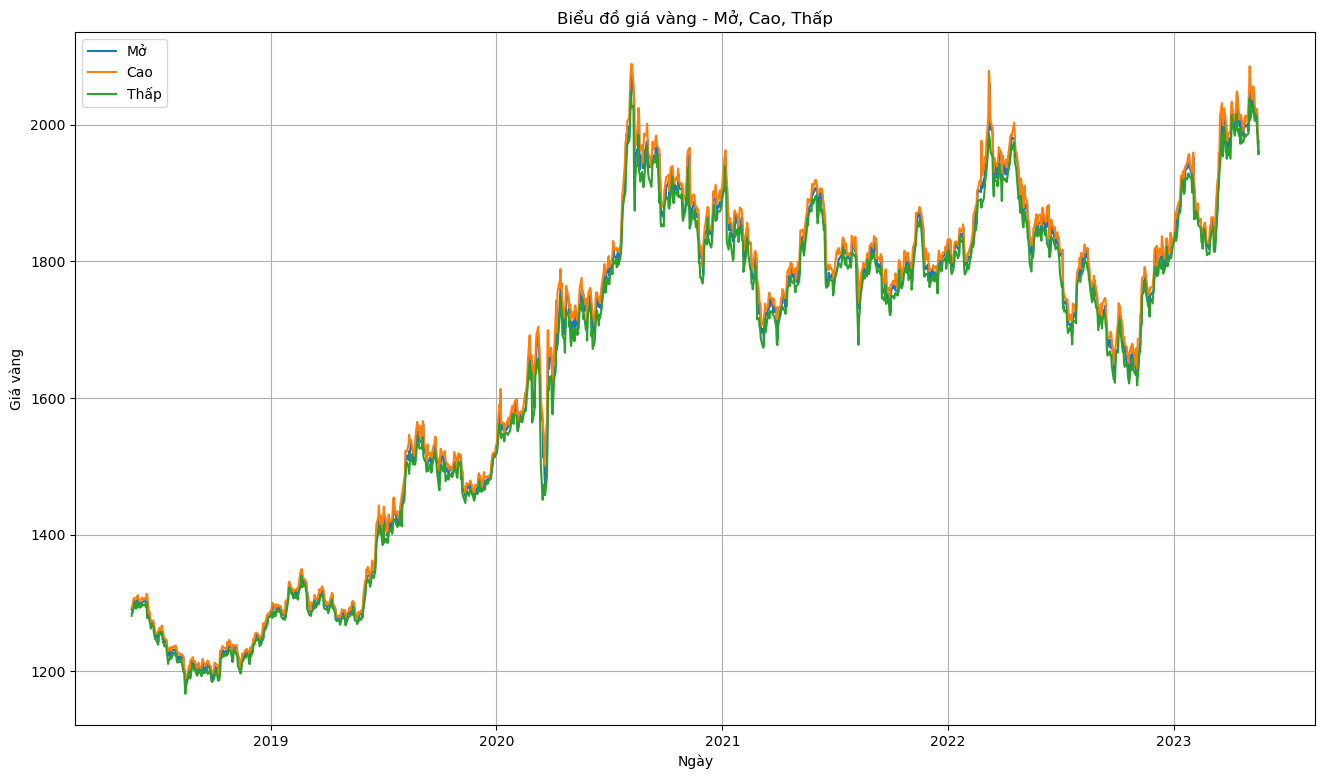

In [47]:
import matplotlib.pyplot as plt

# Trực quan hóa cột "Lần cuối"
plt.figure(figsize=(16, 9))
plt.plot(data_gold.index, data_gold['Lần cuối'])
plt.title('Biểu đồ giá vàng - Lần cuối')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.grid(True)
plt.show()

# Trực quan hóa cột "Mở", "Cao", "Thấp"
plt.figure(figsize=(16, 9))
plt.plot(data_gold.index, data_gold['Mở'], label='Mở')
plt.plot(data_gold.index, data_gold['Cao'], label='Cao')
plt.plot(data_gold.index, data_gold['Thấp'], label='Thấp')
plt.title('Biểu đồ giá vàng - Mở, Cao, Thấp')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.legend()
plt.grid(True)
plt.show()


## chia tập train-test-validate

In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


# Chia features và target
X = data_gold.dropna().drop(columns=['Lần cuối'])
y = data_gold.dropna()['Lần cuối']

# Chia tập train và tập còn lại (test + validate) theo tỷ lệ 7:3
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=42)

# Chia tập test và tập validate từ tập còn lại theo tỷ lệ 2:1
test_size = 2 / 9  # 2 / (2 + 7)
X_test, X_validate, y_test, y_validate = train_test_split(X_rest, y_rest, test_size=test_size, random_state=42)

# In thông tin về kích thước tập train, test và validate
print("Kích thước tập train:", X_train.shape, y_train.shape)
print("Kích thước tập test:", X_test.shape, y_test.shape)
print("Kích thước tập validate:", X_validate.shape, y_validate.shape)



Kích thước tập train: (903, 4) (903,)
Kích thước tập test: (301, 4) (301,)
Kích thước tập validate: (86, 4) (86,)


## Huấn luyện mô hình Random Forest

In [64]:
# Khởi tạo mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập train
model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

## Dự đoán

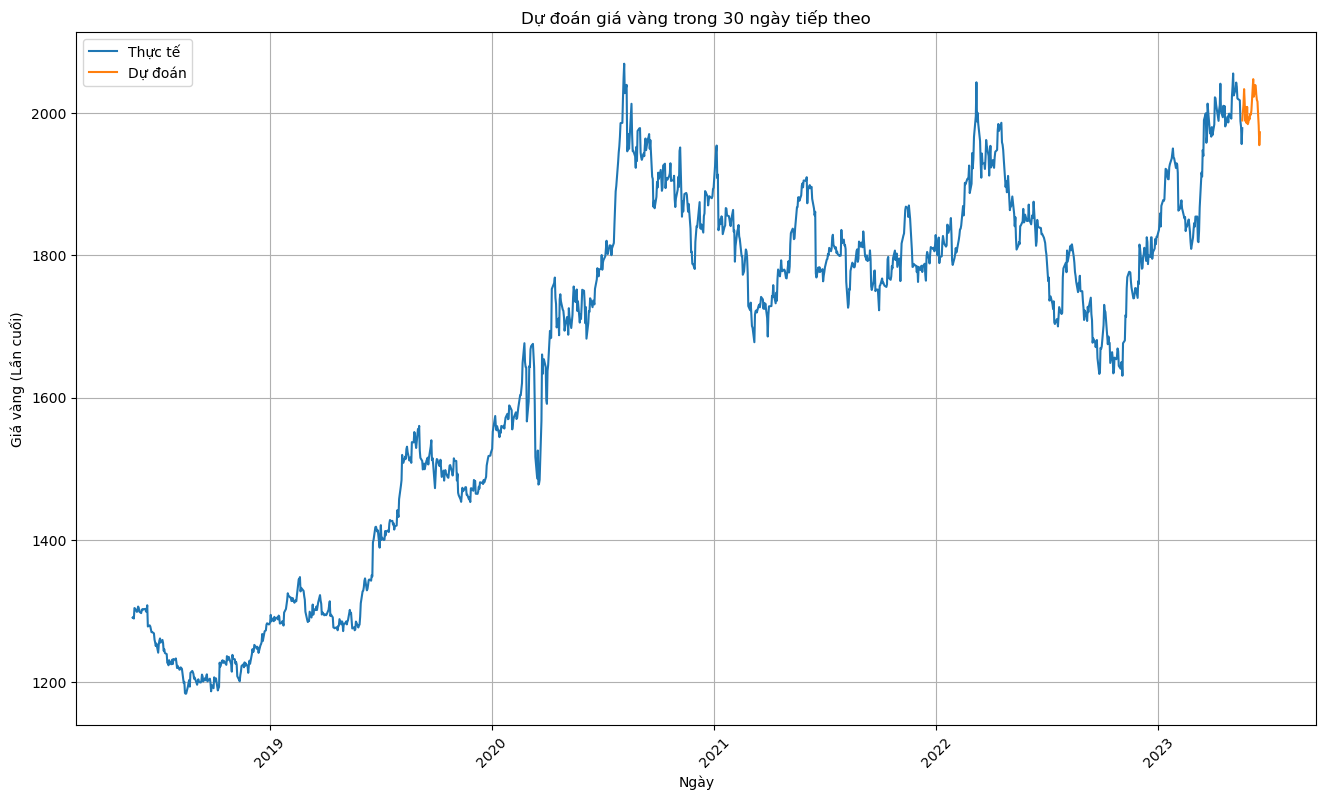

In [67]:
import matplotlib.pyplot as plt

# Lấy 30 ngày cuối cùng từ tập dữ liệu gốc để tạo future_features
last_30_days = data_gold[-30:]

# Xóa cột "Lần cuối" trong future_features vì đây là giá trị chúng ta muốn dự đoán
future_features = last_30_days.drop(columns=['Lần cuối'])

# Dự đoán giá vàng trong 30 ngày tiếp theo
predicted_prices = model.predict(future_features)


# Tạo một mảng chứa 30 ngày tiếp theo
future_dates = pd.date_range(start=data_gold.index[-1], periods=30, freq='D')

# Biểu diễn dự đoán lên đồ thị
plt.figure(figsize=(16, 9))
plt.plot(data_gold.index, data_gold['Lần cuối'], label='Thực tế')
plt.plot(future_dates, predicted_prices, label='Dự đoán')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng (Lần cuối)')
plt.title('Dự đoán giá vàng trong 30 ngày tiếp theo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Đánh giá mô hình

In [68]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_validate_pred = model.predict(X_validate)

# Đánh giá mô hình bằng MAE
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_validate = mean_absolute_error(y_validate, y_validate_pred)
print("Mean Absolute Error (MAE) - Test:", mae_test)
print("Mean Absolute Error (MAE) - Validate:", mae_validate)

# Đánh giá mô hình bằng RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_validate = np.sqrt(mean_squared_error(y_validate, y_validate_pred))
print("Root Mean Squared Error (RMSE) - Test:", rmse_test)
print("Root Mean Squared Error (RMSE) - Validate:", rmse_validate)

# Đánh giá mô hình bằng MAPE
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mape_validate = np.mean(np.abs((y_validate - y_validate_pred) / y_validate)) * 100
print("Mean Absolute Percentage Error (MAPE) - Test:", mape_test)
print("Mean Absolute Percentage Error (MAPE) - Validate:", mape_validate)

Mean Absolute Error (MAE) - Test: 5.915744186046412
Mean Absolute Error (MAE) - Validate: 6.24072093023249
Root Mean Squared Error (RMSE) - Test: 8.182957243310382
Root Mean Squared Error (RMSE) - Validate: 9.334646832546564
Mean Absolute Percentage Error (MAPE) - Test: 0.34549734607762794
Mean Absolute Percentage Error (MAPE) - Validate: 0.37591267663051864
